In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yfin
from scipy.stats import norm

In [21]:
yfin.pdr_override()

stockData = pdr.get_data_yahoo('WIPRO.NS',start='2022-11-01',end='2023-12-10')['Adj Close']

print(stockData)

[*********************100%***********************]  1 of 1 completed
Date
2022-11-01 00:00:00+05:30    391.435852
2022-11-02 00:00:00+05:30    392.982056
2022-11-03 00:00:00+05:30    387.545441
2022-11-04 00:00:00+05:30    389.590393
2022-11-07 00:00:00+05:30    390.538086
                                ...    
2023-01-19 00:00:00+05:30    402.408844
2023-01-20 00:00:00+05:30    402.159454
2023-01-23 00:00:00+05:30    406.000000
2023-01-24 00:00:00+05:30    406.600006
2023-01-25 00:00:00+05:30    401.549988
Name: Adj Close, Length: 61, dtype: float64


<AxesSubplot:xlabel='Date'>

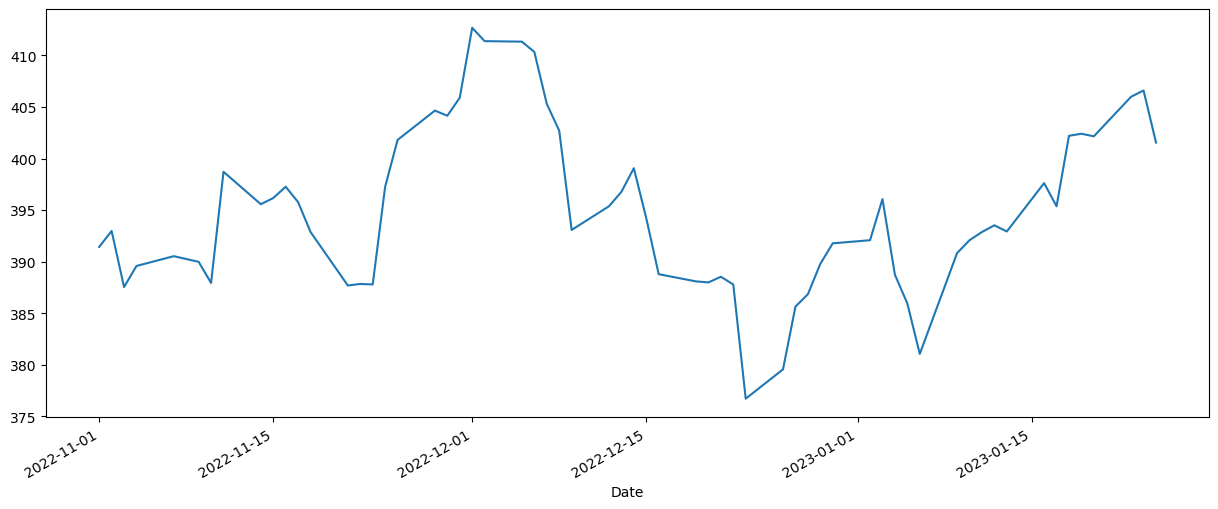

In [22]:
stockData.plot(figsize=(15,6))

In [23]:
logReturns = np.log(1+stockData.pct_change())
logReturns.head()

Date
2022-11-01 00:00:00+05:30         NaN
2022-11-02 00:00:00+05:30    0.003942
2022-11-03 00:00:00+05:30   -0.013931
2022-11-04 00:00:00+05:30    0.005263
2022-11-07 00:00:00+05:30    0.002430
Name: Adj Close, dtype: float64

Text(0.5694444444444446, 0.5, 'Frequency')

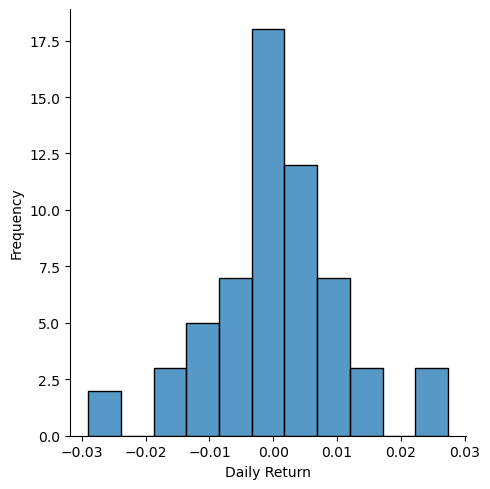

In [24]:
sns.displot(logReturns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

In [25]:
mean = logReturns.mean()
variance = logReturns.var()
drift = mean - (0.5*variance)

In [26]:
drift

0.0003667286961552777

In [27]:
standardDeviation = logReturns.std()
x = np.random.rand(10,2)
norm.ppf(x)
Z = norm.ppf(np.random.rand(50,10000))
t_intervals = 1000
iterations = 10

In [28]:
dailyReturns = np.exp(drift + standardDeviation * norm.ppf(np.random.rand(50,1000)))

In [29]:
dailyReturns

array([[0.98629421, 1.02090439, 1.00215378, ..., 1.00600068, 0.99925582,
        0.98230118],
       [1.01469925, 0.99411963, 0.994973  , ..., 1.01181476, 1.00295267,
        0.99347308],
       [1.00953221, 0.99846855, 1.00703089, ..., 0.99501114, 0.99737757,
        0.99191447],
       ...,
       [0.99995774, 0.99787268, 0.99983857, ..., 0.99072642, 1.01388229,
        1.00393617],
       [0.9970566 , 1.00915819, 0.99901878, ..., 0.99528927, 1.00324572,
        0.9878783 ],
       [0.99598144, 1.00184653, 1.00105621, ..., 1.00147423, 1.005567  ,
        1.00074489]])

In [30]:
priceList = np.zeros_like(dailyReturns)

In [31]:
priceList[0] = stockData.iloc[-1]

In [32]:
for t in range(1, 50):
    priceList[t] = priceList[t-1]*dailyReturns[t]

In [33]:
priceList.shape

(50, 1000)

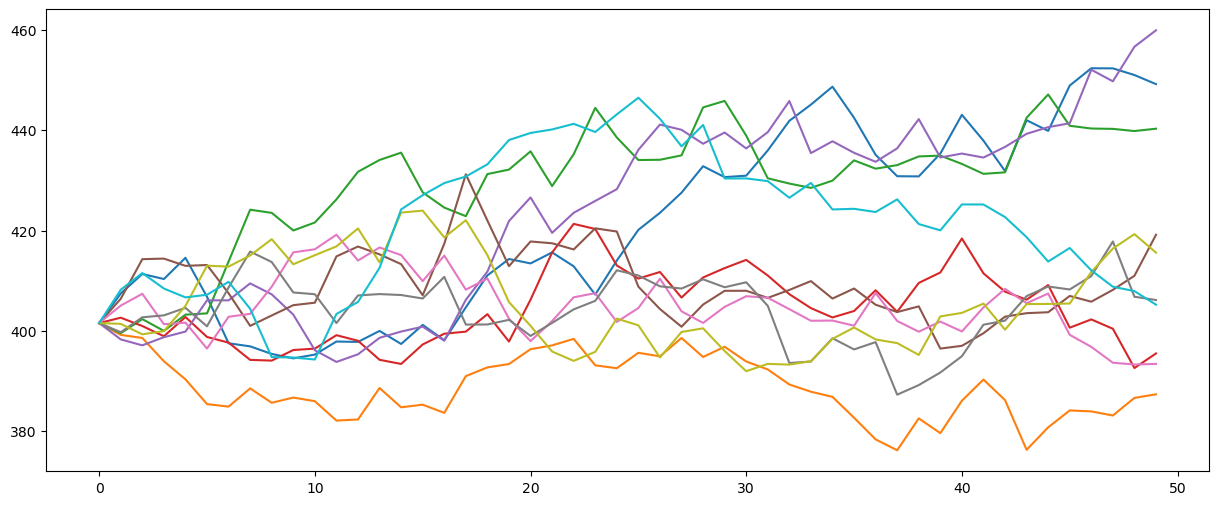

In [34]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(priceList).iloc[:,0:10])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

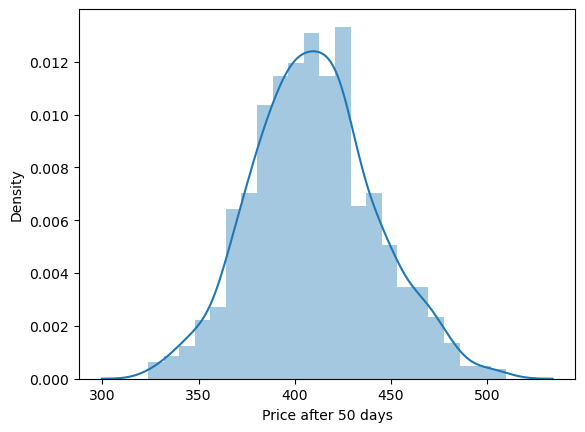

In [35]:
sns.distplot(pd.DataFrame(priceList).iloc[-1])
plt.xlabel("Price after 50 days")

In [36]:
df = pd.DataFrame(priceList)

In [20]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,...,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988,401.549988
1,401.096059,397.956045,409.520293,405.464996,403.298712,410.423658,398.820160,399.737517,413.310879,396.373007,...,403.199186,406.871615,415.803524,397.000107,403.446257,399.024267,401.327022,399.473805,401.568964,400.712554
2,399.361561,397.272793,408.999649,398.482678,401.141712,415.272231,399.956638,398.464752,417.897498,396.489123,...,411.645329,405.438493,416.740834,399.875309,401.609578,411.262128,406.299425,393.478758,406.147829,407.003563
3,392.133353,394.458361,409.425521,403.197291,399.281016,415.608365,403.944259,394.899084,417.691100,392.027371,...,409.401853,399.895582,414.042838,403.314708,396.682995,413.286573,405.300102,392.721032,403.183997,399.851257
4,395.612002,392.339043,414.674222,401.727162,404.146890,418.998318,412.916748,395.555297,420.110661,384.614562,...,411.592067,396.847851,413.461044,399.501744,394.108245,410.270132,402.525793,396.763271,400.435775,406.940894


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


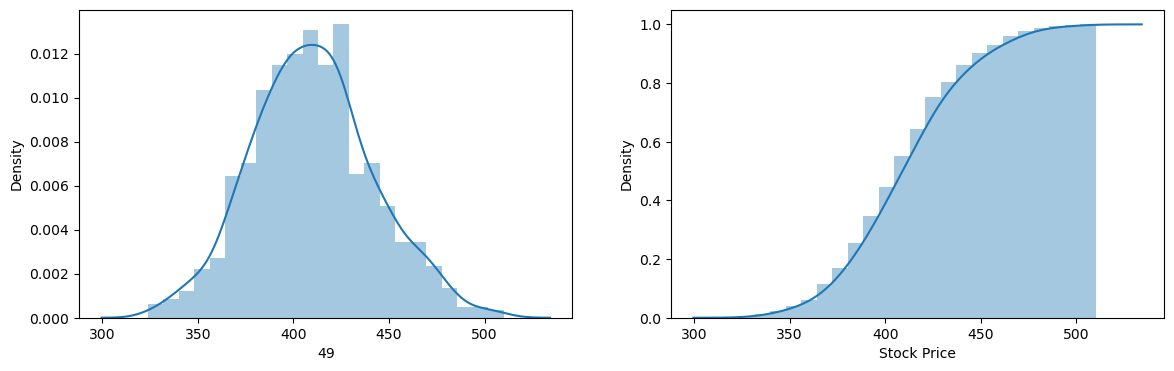

In [37]:
x = pd.DataFrame(priceList).iloc[-1]
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.distplot(x, ax=ax[0])
sns.distplot(x, hist_kws={'cumulative':True},kde_kws={'cumulative':True},ax=ax[1])
plt.xlabel("Stock Price")
plt.show()

In [39]:
print(f"Days: {50-1}")
print(f"Expected Value: ${round(pd.DataFrame(priceList).iloc[-1].mean(),2)}")
print(f"Return: {round(100*(pd.DataFrame(priceList).iloc[-1].mean()-priceList[0,1])/pd.DataFrame(priceList).iloc[-1].mean(),2)}%")

Days: 49
Expected Value: $410.08
Return: 2.08%
